# Dependencies

In [1]:
import argparse

import os
import torch

import matplotlib.pyplot as plt
import numpy as np

from model.models import Darknet, load_weights, load_darknet_weights
from utils.utils import *

# Load in model

In [2]:
cfg_path = './cfg/yolov3.cfg'
weights_path = './weights/darknet53.conv.74'

In [3]:
### 

# Load in convolutional darknet.
# TODO: Set a default img_size for convenience.
def get_darknet(img_size, cfg=cfg_path):
    return Darknet(cfg, img_size)

# Load in weights

In [4]:
model = get_darknet(img_size=832)

In [6]:
load_darknet_weights(model, weights_path)

In [10]:
from model.dataloader import HELMETDataLoader
dataloader = HELMETDataLoader("./data/HELMET_DATASET_DUMMY", shuffle=True, batch_size=6)

In [11]:
batch = next(iter(dataloader))

imgs, annotations = batch

print(imgs[0].shape)

out = model(imgs[0].reshape(1, 3, 832, 832))


print("output")
print(out)
print(out.shape)

torch.Size([3, 832, 832])
output
tensor([[[ 1.35541e+01,  1.76110e+01,  1.39578e+02,  ..., -6.11213e-01,  5.86769e-02,  2.31780e-01],
         [ 4.95732e+01,  1.47322e+01,  1.02370e+02,  ..., -6.17007e-01,  5.09513e-01, -3.66467e-01],
         [ 7.94690e+01,  1.58029e+01,  1.76041e+02,  ..., -1.15864e+00, -8.49418e-01,  6.73425e-01],
         ...,
         [ 8.12351e+02,  8.28541e+02,  4.25026e+01,  ..., -3.21535e-01, -1.08044e+00, -1.62849e-01],
         [ 8.20659e+02,  8.27647e+02,  7.22788e+01,  ...,  5.81155e-02, -6.75931e-01, -4.11870e-01],
         [ 8.27344e+02,  8.27002e+02,  3.68352e+01,  ..., -6.74750e-01, -3.79307e-01, -1.67148e-01]]])
torch.Size([1, 42588, 85])


# Detection "unit test"

In [12]:
# cuda = torch.cuda.is_available()
device = 'cpu' # device = torch.device('cuda:0' if cuda else 'cpu')

In [14]:
opt = {'conf_thres': .5, 
       'nms_thres': .45
      }

In [15]:
# os.system('rm -rf ' + opt.output_folder)
# os.makedirs(opt.output_folder, exist_ok=True)

model.to(device).eval()

# Set Dataloader
# classes = load_classes(opt.class_path)  # Extracts class labels from file
# dataloader = load_images(opt.image_folder, batch_size=opt.batch_size, img_size=opt.img_size)

imgs = []  # Stores image paths
img_detections = []  # Stores detections for each image index
# for batch_i, (img_paths, img) in enumerate(dataloader):
#     print(batch_i, img.shape, end=' ')

batch = next(iter(dataloader))

batch_imgs, batch_annotations = batch

# Get detections
with torch.no_grad():
    # chip = torch.from_numpy(img).unsqueeze(0).to(device)
    pred = model(batch_imgs[0].reshape(1, 3, 832, 832)) # pred = model(chip)
    pred = pred[pred[:, :, 4] > opt['conf_thres']]

    if len(pred) > 0:
        detections = non_max_suppression(pred.unsqueeze(0), opt['conf_thres'], opt['nms_thres'])
        img_detections.extend(detections)
        # imgs.extend(img_paths)

In [16]:
detections

[None]

(-0.5, 831.5, 831.5, -0.5)

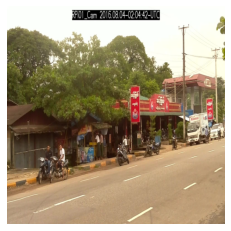

In [17]:
plt.imshow(np.array(batch_imgs[0]).transpose([1, 2, 0]))
plt.axis('off')

# Train loop

In [20]:
model.to(device).train()

train_batch = torch.rand((3, 3, 832, 832))

